In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [79]:
# Download VADER lexicon
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [80]:

# Define column names based on dataset description
column_names = ['id', 'text', 'target', 'user', 'created_at']


In [81]:
# Load the dataset with manual column names
data = pd.read_csv('twitter_validation.csv', names=column_names)


In [82]:
# Display the first few rows of the dataset
print(data.head())


     id       text      target  \
0  3364   Facebook  Irrelevant   
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                                user  created_at  
0  I mentioned on Facebook that I was struggling ...         NaN  
1  BBC News - Amazon boss Jeff Bezos rejects clai...         NaN  
2  @Microsoft Why do I pay for WORD when it funct...         NaN  
3  CSGO matchmaking is so full of closet hacking,...         NaN  
4  Now the President is slapping Americans in the...         NaN  


In [83]:
# Check for missing values in the 'text' column
print(data['text'].isnull().sum())

# Display rows with missing text
print(data[data['text'].isnull()])


0
Empty DataFrame
Columns: [id, text, target, user, created_at]
Index: []


In [84]:
# Drop rows with missing text
data.dropna(subset=['text'] )


,id,text,target,user,created_at
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,NaN
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,NaN
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,NaN
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",NaN
4,4433,Google,Neutral,Now the President is slapping Americans in the...,NaN
...,...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,NaN
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,NaN
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,NaN
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,NaN


In [85]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()


In [86]:
def get_sentiment(text):
    if isinstance(text, str):  # Ensure text is a string
        scores = sid.polarity_scores(text)
        return scores['compound']
    else:
        return 0  # Neutral score for non-string values


In [87]:
# Apply sentiment analysis
data['sentiment_score'] = data['text'].apply(get_sentiment)


In [88]:
# Define sentiment categories
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment'] = data['sentiment_score'].apply(categorize_sentiment)


In [89]:

# Exploratory Data Analysis (EDA)
print(data['sentiment'].value_counts())


sentiment
Neutral     940
Positive     34
Negative     26
Name: count, dtype: int64


In [90]:
# Display a few examples of each sentiment category
print("Positive examples:")
print(data[data['sentiment'] == 'Positive'].head())

print("\nNegative examples:")
print(data[data['sentiment'] == 'Negative'].head())

print("\nNeutral examples:")
print(data[data['sentiment'] == 'Neutral'].head())

Positive examples:
      id    text      target  \
1    352  Amazon     Neutral   
43   316  Amazon     Neutral   
75   171  Amazon  Irrelevant   
117   96  Amazon    Positive   
153  122  Amazon     Neutral   

                                                  user  created_at  \
1    BBC News - Amazon boss Jeff Bezos rejects clai...         NaN   
43   Amazon stops accepting new online grocery cust...         NaN   
75   AOC you make some very ignorant comments\nWhen...         NaN   
117  Seeing Amazon Prime marketing Borat by getting...         NaN   
153  I didn't have massive success in #IndieApril b...         NaN   

     sentiment_score sentiment  
1             0.1779  Positive  
43            0.1779  Positive  
75            0.1779  Positive  
117           0.1779  Positive  
153           0.1779  Positive  

Negative examples:
       id         text      target  \
97   1589  Battlefield    Negative   
163  1495  Battlefield  Irrelevant   
188  1203  Battlefield  Irrelevant 

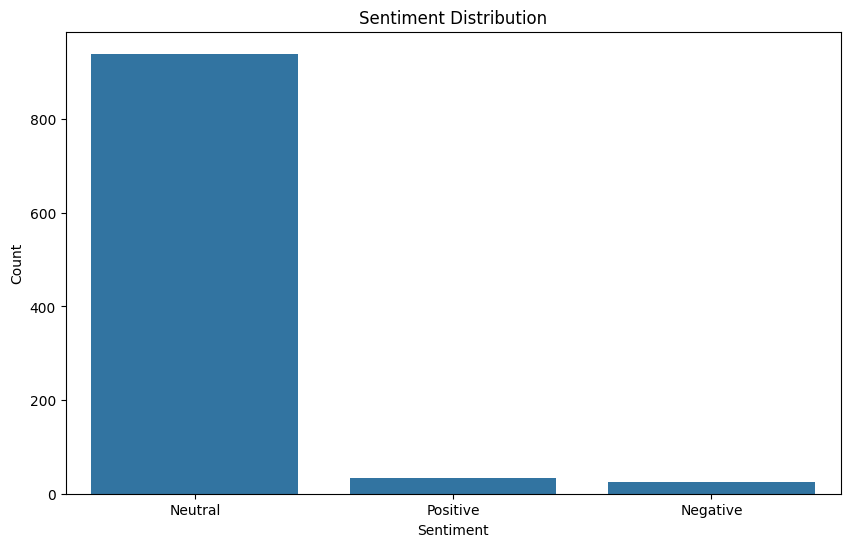

In [91]:

# Visualization of Sentiment Patterns
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


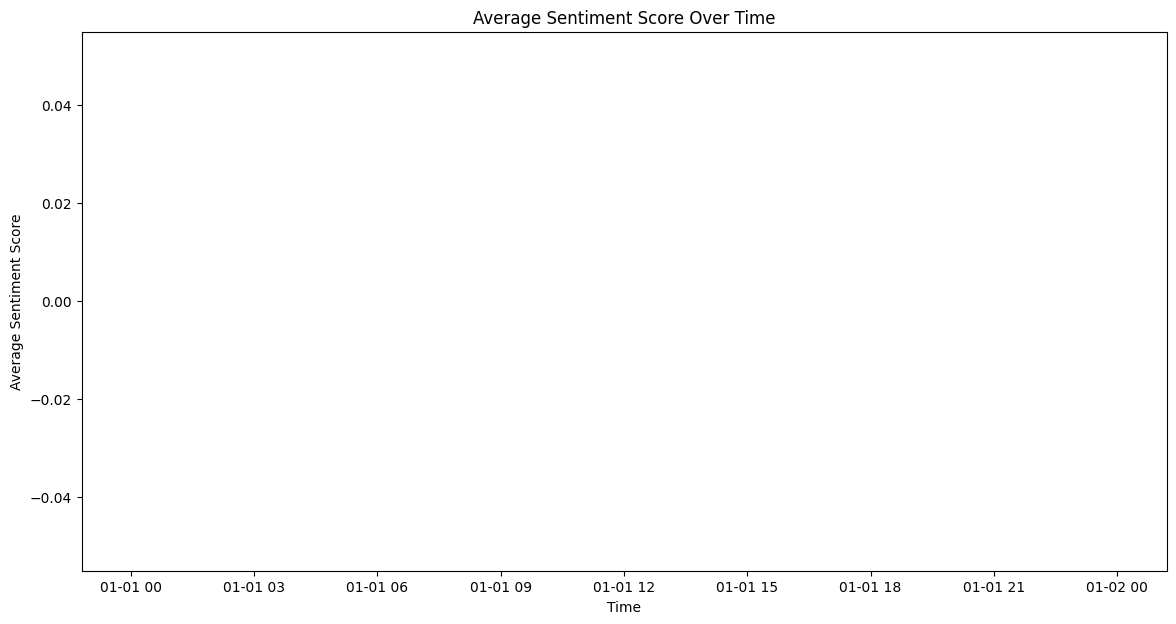

In [92]:
# Sentiment distribution over time (assuming 'created_at' column exists)
if 'created_at' in data.columns:
    # Convert 'created_at' to datetime
    data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce')
    
    # Drop rows where 'created_at' is NaT
    data = data.dropna(subset=['created_at'])
    
    # Set 'created_at' as the index
    data.set_index('created_at', inplace=True)
    
    # Resample by month-start and calculate mean sentiment score
    sentiment_time = data.resample('MS').agg({'sentiment_score': 'mean'})
    
    # Plot the sentiment over time
    plt.figure(figsize=(14, 7))
    plt.plot(sentiment_time, marker='o', linestyle='-')
    plt.title('Average Sentiment Score Over Time')
    plt.xlabel('Time')
    plt.ylabel('Average Sentiment Score')
    plt.show()


In [93]:
# Function to generate word clouds
def generate_wordcloud(text, title):
    if text.strip():  # Check if the text is not empty
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        print(f"No text available for {title}")


In [94]:
 # Generate word clouds for each sentiment category
from wordcloud import WordCloud


positive_text = ' '.join(data[data['sentiment'] == 'Positive']['text'])
negative_text = ' '.join(data[data['sentiment'] == 'Negative']['text'])
neutral_text = ' '.join(data[data['sentiment'] == 'Neutral']['text'])


In [95]:
generate_wordcloud(positive_text, 'Positive Tweets')
generate_wordcloud(negative_text, 'Negative Tweets')
generate_wordcloud(neutral_text, 'Neutral Tweets')

No text available for Positive Tweets
No text available for Negative Tweets
No text available for Neutral Tweets


In [96]:
word_cloud_text = ''.join(train[train["Sentiment"]=="Irrelevant"].Tweet_content)
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(6,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

NameError: name 'train' is not defined